# Simple Gillespie SSA
This is an example of running a Gillespie simulation for 1 species

First we must manage our imports

In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Setting up parameters and the dataframe

In [122]:
k1=0.1;
k2=1;

Ainitial=0;
numberofrealisations=5;
timeSteps = 1000;
columns = ['Population Size','Time','iteration number']

In [123]:
matrix = np.zeros((timeSteps*numberofrealisations,3))
for i in range(numberofrealisations):
    time = 0
    A=Ainitial
    print(i*numberofrealisations)
    for k in range(timeSteps):
        r1 = np.random.rand()
        r2 = np.random.rand()
        a0=k1*A+k2;
        time+=(1/a0)*np.log(1/r1)
        if (r2*a0<k1*A):
            A=A-1
        else:
            A=A+1
        matrix[k+i*timeSteps,0] = A
        matrix[k+i*timeSteps,1] = time
        matrix[k+i*timeSteps,2] = i

0
5
10
15
20


In [124]:
df = pd.DataFrame(data=matrix, columns=columns)
print(df.head())

   Population Size      Time  iteration number
0              1.0  0.747722               0.0
1              2.0  0.800773               0.0
2              1.0  1.056009               0.0
3              2.0  1.253613               0.0
4              3.0  1.800356               0.0


In [125]:
print(df[df["iteration number"] == 1]["Time"])

1000      0.469874
1001      0.591851
1002      0.938220
1003      2.588150
1004      7.144274
           ...    
1995    508.050376
1996    508.213080
1997    508.243157
1998    508.286179
1999    508.703343
Name: Time, Length: 1000, dtype: float64


# Plot the simulations

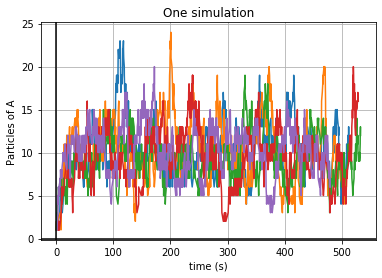

In [126]:
fig, ax = plt.subplots()

for i in range(numberofrealisations):
    ax.plot(df[df["iteration number"] == i]["Time"], df[df["iteration number"] == i]["Population Size"])

ax.set(xlabel='time (s)', ylabel='Particles of A',
       title='One simulation')
#ax.set_aspect('equal')


ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()